In [1]:
%run /Users/denis/Documents/Projects/scripts/init.ipy
os.chdir(os.getcwd().replace('/pipeline/notebooks', ''));

In [10]:
merged_auc_dataframe = pd.read_table('./s4-merged_auc.dir/merged_auc.txt')
merged_auc_dataframe = merged_auc_dataframe.query('normalization in ["correlation", "correlation_abs", "raw", "zscore"]')
merged_auc_dataframe.head()

term_name       auc    normalization  \
0  AKT1_human_kinase_ARCHS4_coexpression  0.991607      correlation   
1  AKT1_human_kinase_ARCHS4_coexpression  0.986900  correlation_abs   
3  AKT1_human_kinase_ARCHS4_coexpression  0.903404              raw   
4  AKT1_human_kinase_ARCHS4_coexpression  0.975910           zscore   
6  AKT2_human_kinase_ARCHS4_coexpression  0.981730      correlation   

                library  nr_genes  
0  ARCHS4_Kinases_Coexp       299  
1  ARCHS4_Kinases_Coexp       299  
3  ARCHS4_Kinases_Coexp       299  
4  ARCHS4_Kinases_Coexp       299  
6  ARCHS4_Kinases_Coexp       299

In [11]:
# Cast dataframe
cast_dataframe = merged_auc_dataframe.pivot_table(index=['term_name', 'library'], columns='normalization', values='auc').dropna().reset_index().set_index('term_name')#.merge(merged_auc_dataframe[['term_name', 'library']]).reset
cast_dataframe.head()

normalization                                                          library  \
term_name                                                                        
'de novo' posttranslational protein folding (GO...  GO_Biological_Process_2018   
1-acylglycerol-3-phosphate O-acyltransferase ac...  GO_Molecular_Function_2018   
1-phosphatidylinositol 4-kinase activity (GO:00...  GO_Molecular_Function_2018   
1-phosphatidylinositol binding (GO:0005545)         GO_Molecular_Function_2018   
1-phosphatidylinositol-3-kinase activity (GO:00...  GO_Molecular_Function_2018   

normalization                                       correlation  \
term_name                                                         
'de novo' posttranslational protein folding (GO...     0.827933   
1-acylglycerol-3-phosphate O-acyltransferase ac...     0.697563   
1-phosphatidylinositol 4-kinase activity (GO:00...     0.906332   
1-phosphatidylinositol binding (GO:0005545)            0.788291   
1-phosphatidylinositol-3-kinase activity (GO:00...     0.718698   

normalization                                       correlation_abs       raw  \
term_name                                                                       
'de novo' posttranslational protein folding (GO...         0.720460  0.861917   
1-acylglycerol-3-phosphate O-acyltransferase ac...         0.461989  0.833246   
1-phosphatidylinositol 4-kinase activity (GO:00...         0.845378  0.878809   
1-phosphatidylinositol binding (GO:0005545)                0.653628  0.855667   
1-phosphatidylinositol-3-kinase activity (GO:00...         0.554657  0.870150   

normalization                                         zscore  
term_name                                                     
'de novo' posttranslational protein folding (GO...  0.942740  
1-acylglycerol-3-phosphate O-acyltransferase ac...  0.973046  
1-phosphatidylinositol 4-kinase activity (GO:00...  0.936269  
1-phosphatidylinositol binding (GO:0005545)         0.843917  
1-phosphatidylinositol-3-kinase activity (GO:00...  0.989266

/Users/denis/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



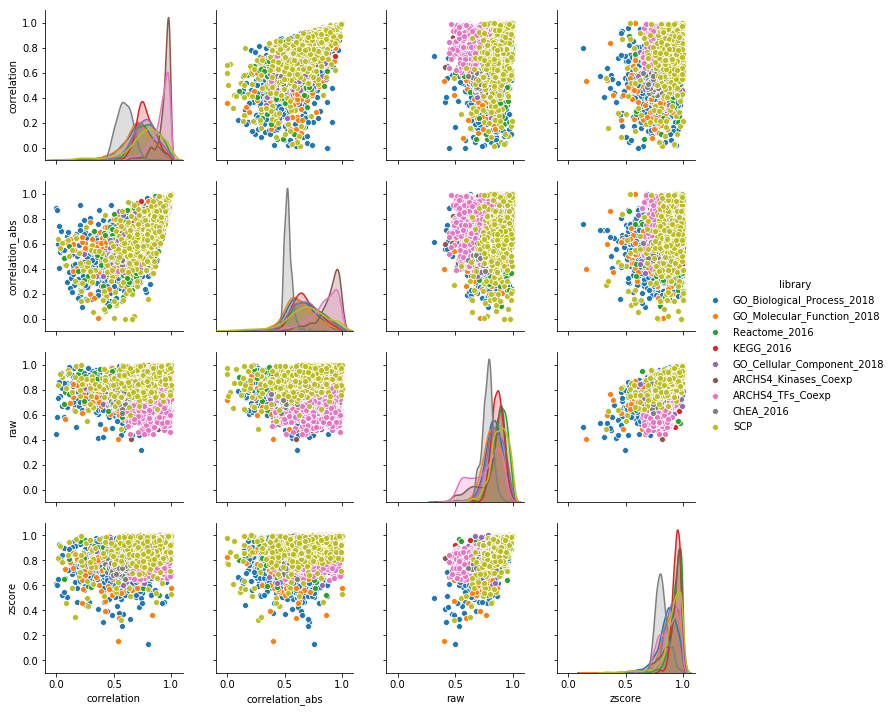

In [12]:
# Single plot
lim = (-0.1, 1.1)
p = sns.pairplot(cast_dataframe, hue='library');
p.set(xlim=lim, ylim=lim);

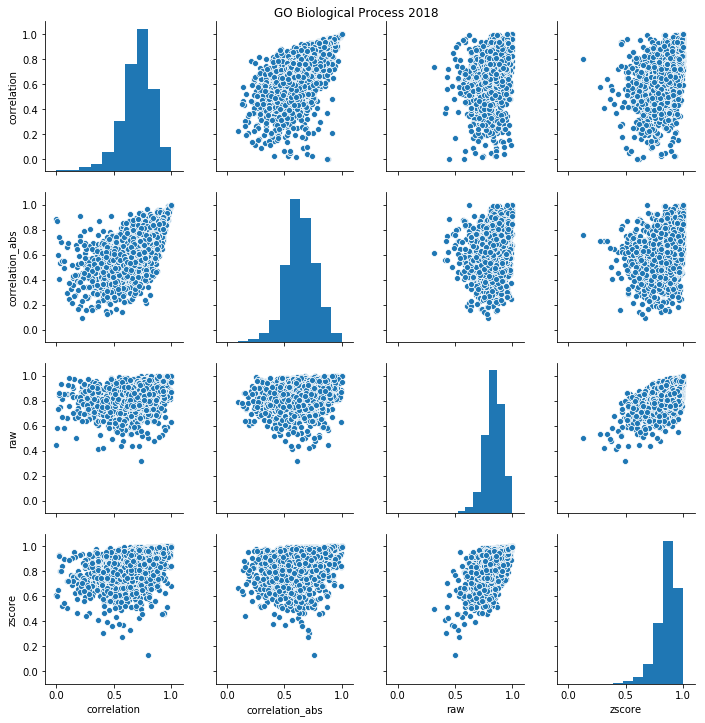

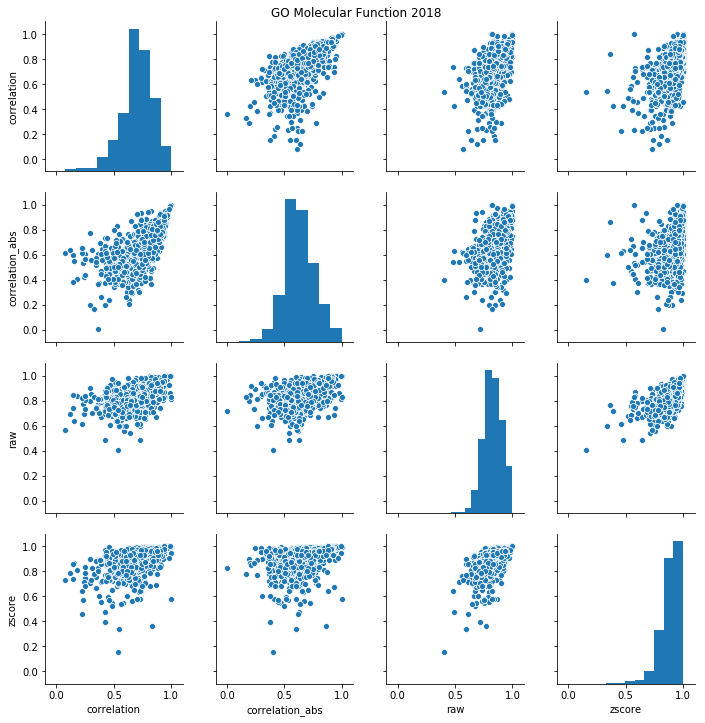

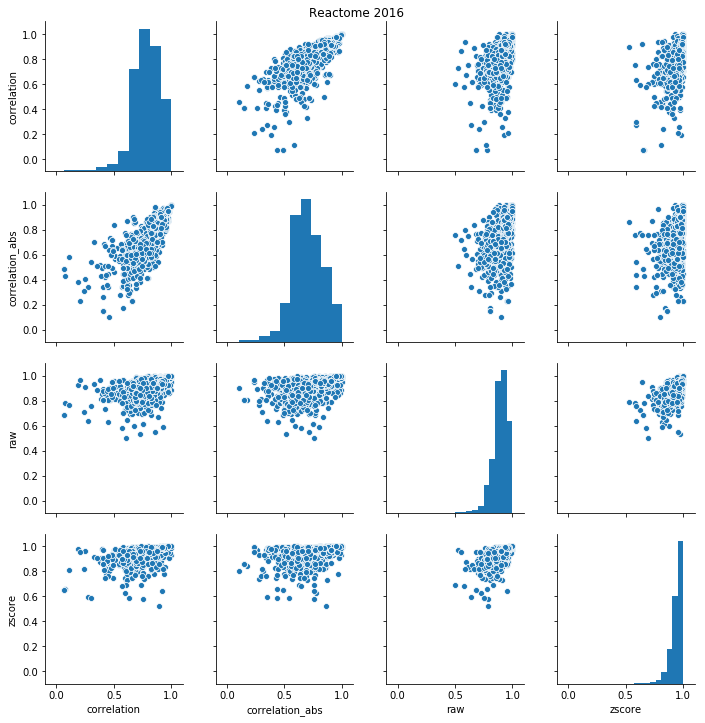

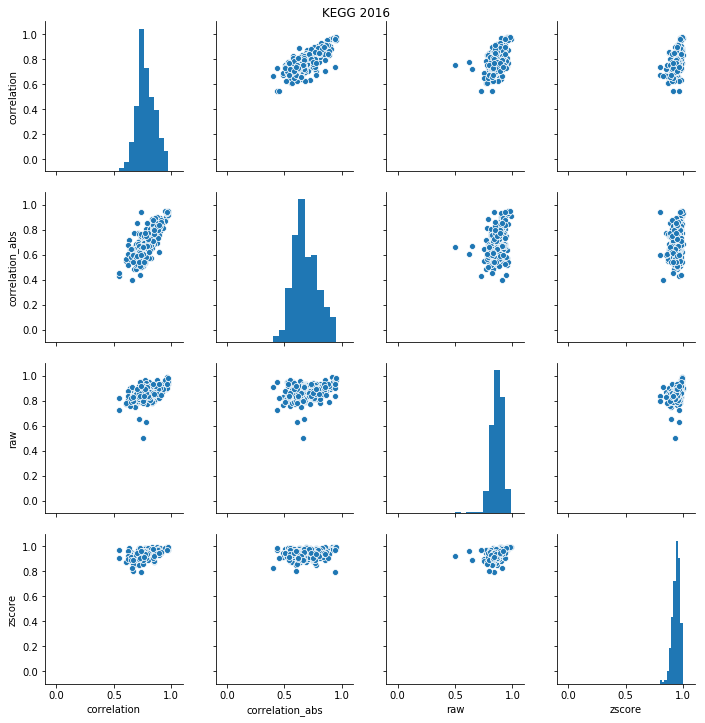

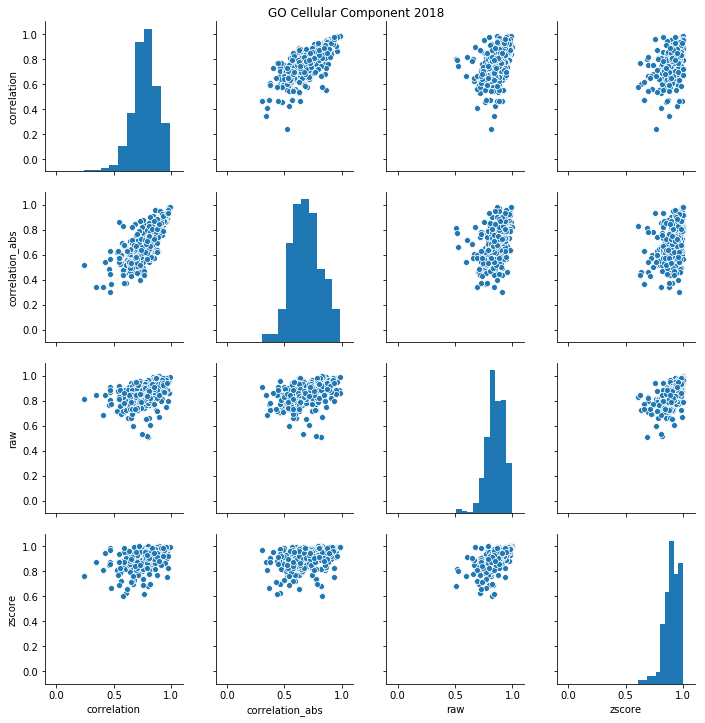

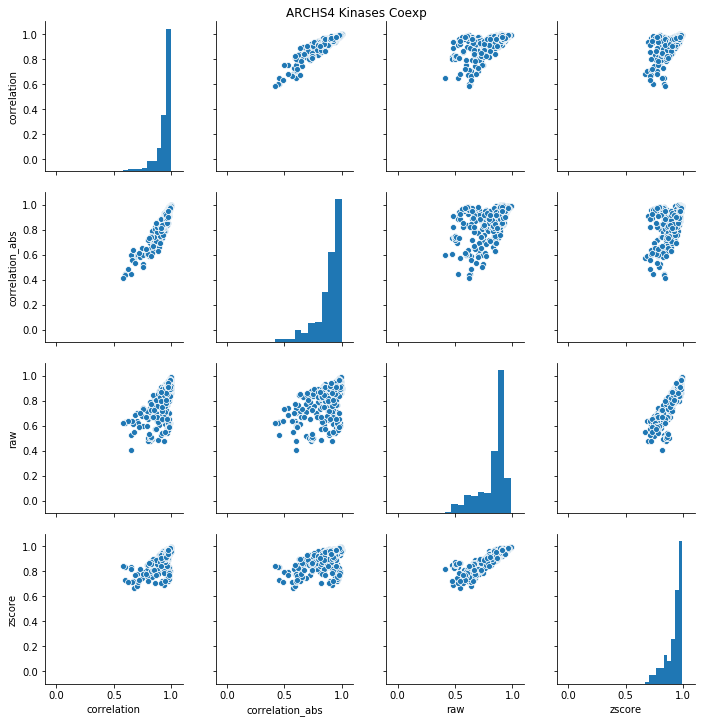

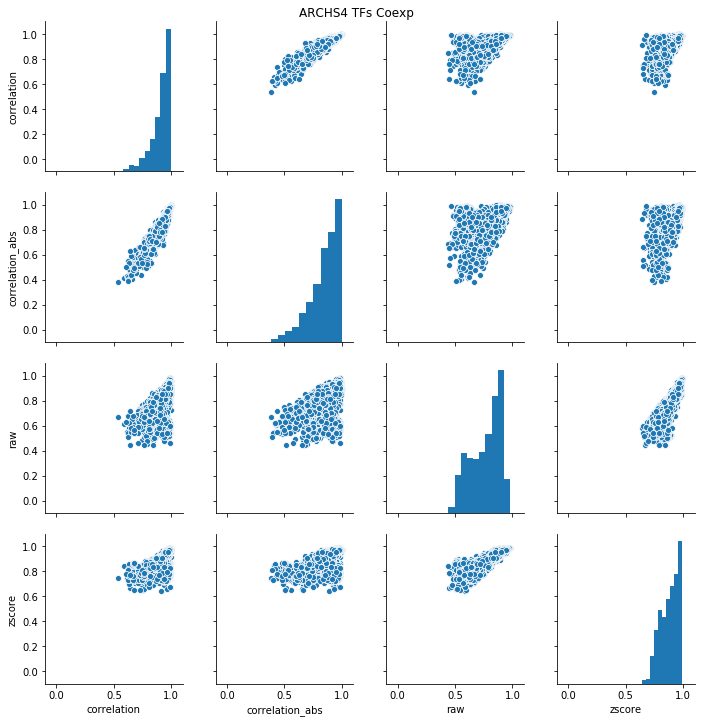

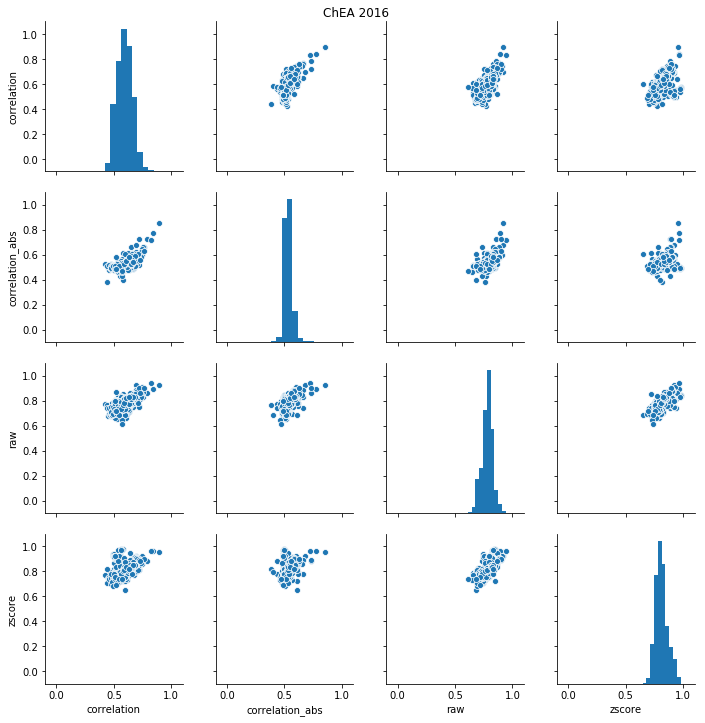

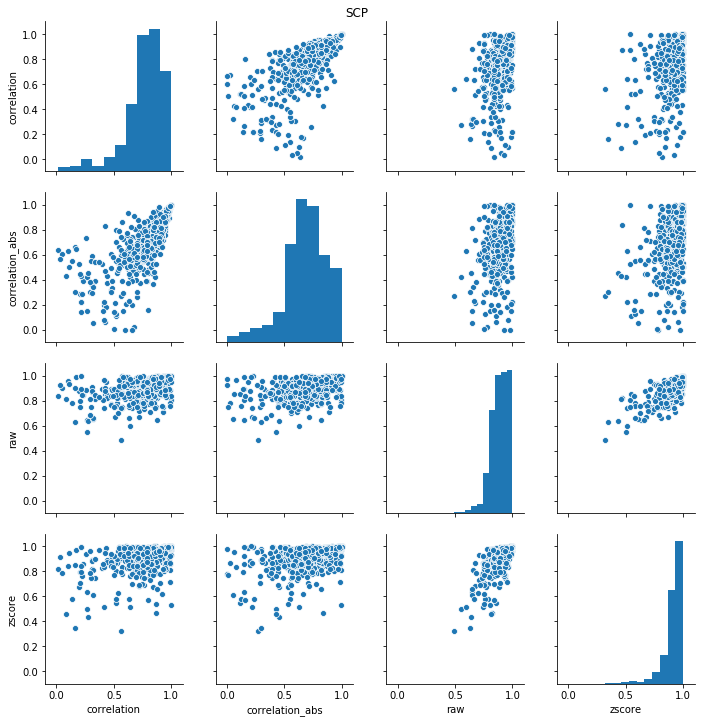

In [13]:
# Loop through libraries
for library in cast_dataframe['library'].unique():
    
    # Plot dataframe
    filtered_dataframe = cast_dataframe[cast_dataframe['library']==library]
    p = sns.pairplot(filtered_dataframe);
    plt.suptitle(library.replace('_', ' '), y=1);
    p.set(xlim=(-0.1, 1.1), ylim=(-0.1, 1.1));